In [21]:
#!pip install keras

In [22]:

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt #%matplotlib inline

In [23]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train[0].shape

(28, 28)

In [24]:
#Let's just look at a particular example to see what is inside 
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

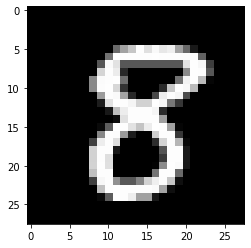

In [25]:
# Let's see what this image actually looks like
plt.imshow(x_train[333], cmap='Greys_r')

In [26]:
# this is the shape of the np.array x_train # it is 3 dimensional.
print(x_train.shape, 'train samples') 
print(x_test.shape, 'test samples')


(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [27]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28) 
x_test = x_test.reshape(len(x_test), 28*28)
## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
## Normalize the inputs so they are between 0 and 1
x_train /= 255 
x_test /= 255
# convert class vectors to binary class matrices
num_classes = 10


In [28]:
#y_train = keras.utils.to_categorical(y_train, num_classes) 
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes) 
#y_test = keras.utils.to_categorical(y_test, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes) 
y_train[333] # now the digit k is represented by a 1 in the kth entry (0-indexed) of t

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [29]:
# We will build a model with two hidden layers of size 512 # Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,))) 
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu')) 
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [30]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Let's compile the model
learning_rate = .001 
batch_size = 128 # mini-batch with 128 examples 
epochs = 30

model_1.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=learning_rate),
metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization
# of the loss function we had in binary classification case, to multi class case

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [32]:
# And now let's fit.
history = model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.5084 - accuracy: 0.8497 - val_loss: 0.1998 - val_accuracy: 0.9417
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2424 - accuracy: 0.9298 - val_loss: 0.1470 - val_accuracy: 0.9569
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1927 - accuracy: 0.9442 - val_loss: 0.1257 - val_accuracy: 0.9619
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1683 - accuracy: 0.9502 - val_loss: 0.1195 - val_accuracy: 0.9639
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1477 - accuracy: 0.9567 - val_loss: 0.1066 - val_accuracy: 0.9704
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1374 - accuracy: 0.9599 - val_loss: 0.1013 - val_accuracy: 0.9711
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1308 - accuracy: 0.9622 - val_loss: 0.0968 - val_accuracy: 0.9718
Epoch 

In [33]:
score = model_1.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10770341753959656
Test accuracy: 0.9769999980926514


In [34]:
def plot_loss_accuracy(history):
  fig = plt.figure(figsize=(12, 6))
  ax = fig.add_subplot(1, 2, 1) 
  ax.plot(history.history["loss"],'r-x', label="Train Loss") 
  ax.plot(history.history["val_loss"],'b-x', label="Validation Loss") 
  ax.legend()
  ax.set_title('cross_entropy loss')
  ax.grid(True)
  ax = fig.add_subplot(1, 2, 2)
  ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy") 
  ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy") 
  ax.legend()
  ax.set_title('accuracy')
  ax.grid(True)


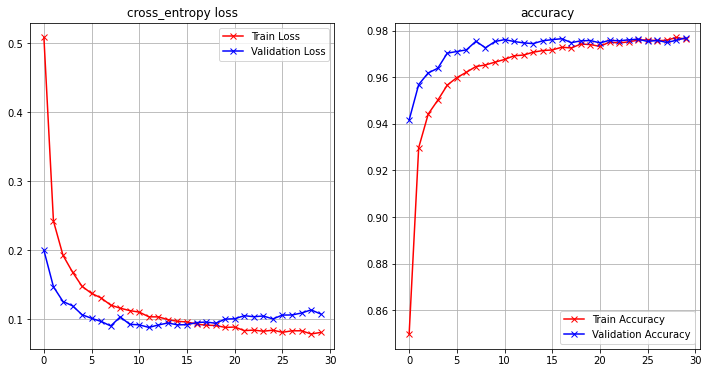

In [35]:
plot_loss_accuracy(history)